**Importing the required packages**

In [262]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as make_subplots
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import make_scorer


**Getting the raw dataset from github and reading it using the "df"**

In [263]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


to get count of rows and columns

In [264]:

df.shape

(7109, 22)

to get data types of columns

In [265]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

# *DATA CLEANING*

Detecting null values

In [266]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

Removing null values from three columns using mode  and mean value

In [267]:
df["N_BEDROOM"].fillna(df['N_BEDROOM'].mode()[0],inplace=True)
df.isnull().sum()


df["N_BATHROOM"].fillna(df['N_BATHROOM'].mode()[0],inplace=True)
df.isnull().sum()

x=df['QS_OVERALL'].mean()
df['QS_OVERALL'].fillna(x,inplace=True)
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

converting data types of columns which has different data types

In [268]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)
df['QS_ROOMS']=df['QS_ROOMS'].astype(int)
df['QS_BATHROOM']=df['QS_BATHROOM'].astype(int)
df['QS_BEDROOM']=df['QS_BEDROOM'].astype(int)
df['QS_OVERALL']=df['QS_OVERALL'].astype(int)
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                  int64
QS_BATHROOM               int64
QS_BEDROOM                int64
QS_OVERALL                int64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

to find age of the house, Creating a new column HOUSEAGE BY subtracting year of date build from year of date sale

In [269]:
df['HOUSEAGE']=df['DATE_SALE'].dt.year-df['DATE_BUILD'].dt.year
df['HOUSEAGE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: HOUSEAGE, Length: 7109, dtype: int64

creating new columns HOUSE_PRICE by merging reg fee and commis with the sale price

In [270]:
df['HOUSE_PRICE']=df['SALES_PRICE']+df['REG_FEE']+df['COMMIS']
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSEAGE,HOUSE_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,A,4,3,4,4,380000,144400,7600000,44,8124400
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4,4,2,3,760122,304049,21717770,11,22781941
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,RL,4,3,2,3,421094,92114,13159200,20,13672408
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4,3,3,4,356321,77042,9630290,22,10063653
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,C,3,2,4,3,237000,74063,7406250,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,...,RM,3,2,2,2,208767,107060,5353000,49,5668827
7105,P10000,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,...,RH,3,4,3,3,346191,205551,10818480,9,11370222
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,...,I,4,4,2,3,317354,167028,8351410,28,8835792
7107,P06508,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,...,RL,4,3,4,4,425350,119098,8507000,32,9051448


In [271]:
df.describe()


,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSEAGE,HOUSE_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.075538,3.069349,3.056126,3.004501,376938.330708,141005.726544,1.089491e+07,24.276270,1.141285e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.872937,0.876024,0.871499,0.603154,143070.662010,78768.093718,3.768603e+06,12.334164,3.944957e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000,2.253935e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,272406.000000,84219.000000,8.272100e+06,14.000000,8.645792e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,349486.000000,127628.000000,1.033505e+07,23.000000,1.081953e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,451562.000000,184506.000000,1.299390e+07,34.000000,1.361393e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.000000,983922.000000,495405.000000,2.366734e+07,55.000000,2.496904e+07


To fetch first fow rows

In [272]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSEAGE,HOUSE_PRICE
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,A,4,3,4,4,380000,144400,7600000,44,8124400
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4,4,2,3,760122,304049,21717770,11,22781941
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,RL,4,3,2,3,421094,92114,13159200,20,13672408
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4,3,3,4,356321,77042,9630290,22,10063653
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,C,3,2,4,3,237000,74063,7406250,30,7717313


To fetch last five rows

In [273]:
df.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,HOUSEAGE,HOUSE_PRICE
7104,P03834,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,...,RM,3,2,2,2,208767,107060,5353000,49,5668827
7105,P10000,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,...,RH,3,4,3,3,346191,205551,10818480,9,11370222
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,...,I,4,4,2,3,317354,167028,8351410,28,8835792
7107,P06508,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,...,RL,4,3,4,4,425350,119098,8507000,32,9051448
7108,P09794,Velachery,1896,2005-07-13,156,3,2,5,Partial,Yes,...,I,3,3,4,3,349177,79812,9976480,44,10405469


To display about the information of dataset df

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

To fetch the column names

In [275]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE', 'HOUSEAGE', 'HOUSE_PRICE'],
      dtype='object')

to find the wrong  spelled words in each column with string values and correcting it by mapping 

Finding the unique values in each  column and mapping wrong spelled words with the right one

In [276]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [277]:
df['AREA']=df['AREA'].replace({'Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','Velchery':'Velachery','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','KKNagar':'KK Nagar','TNagar':'T Nagar'})
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [278]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [279]:
df['SALE_COND']=df['SALE_COND'].replace({'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'})
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [280]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [281]:
df['PARK_FACIL']=df['PARK_FACIL'].replace({'Noo':'No'})
df['PARK_FACIL'].unique()


array(['Yes', 'No'], dtype=object)

In [282]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [283]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [284]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [285]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSewr ':'NoSewa','NoSeWa':'NoSewa'})
df['UTILITY_AVAIL'].unique()


array(['AllPub', 'ELO', 'NoSewa'], dtype=object)

In [286]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [287]:
df['STREET']=df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [288]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

Detecting outliers for columns with numerical values

finding the IQR value for each column

In [289]:

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR


INT_SQFT             751.0
DIST_MAINROAD         98.0
N_BEDROOM              1.0
N_BATHROOM             0.0
N_ROOM                 1.0
QS_ROOMS               2.0
QS_BATHROOM            2.0
QS_BEDROOM             2.0
QS_OVERALL             0.0
REG_FEE           179156.0
COMMIS            100287.0
SALES_PRICE      4721800.0
HOUSEAGE              20.0
HOUSE_PRICE      4968135.0
dtype: float64

# **Plotting each column using SNS plot to detect outliers if any**

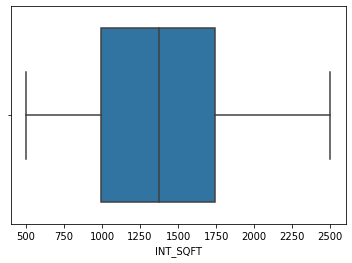

In [290]:
sns.boxplot(x='INT_SQFT',data=df)

there is no outlier in the INT_SQFT column

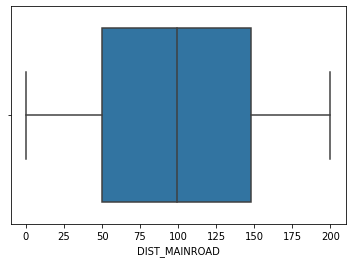

In [291]:
sns.boxplot(x='DIST_MAINROAD',data=df)

THERE IS NO OUTLIERS IN THE DIST_MAINROAD

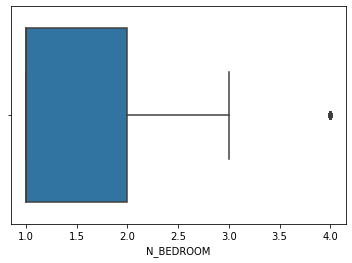

In [292]:
sns.boxplot(x='N_BEDROOM',data=df)

THERE ARE OUTLIERS EXIST IN THE N_BEDROOM and its not bad outlier as such as number of bedroom used to be different from house to house


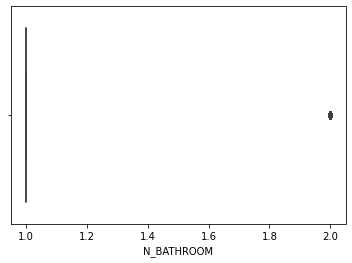

In [293]:
sns.boxplot(x='N_BATHROOM',data=df)

There are outliers exist in the N_BATHROOM column but as it is used be different from house to house its not a bad outlier

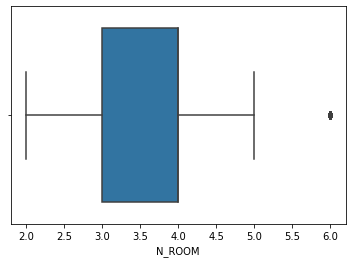

In [294]:
sns.boxplot(x='N_ROOM',data=df)

N_ROOM also has outlier and it is not bad outlier so we are not correcting it also

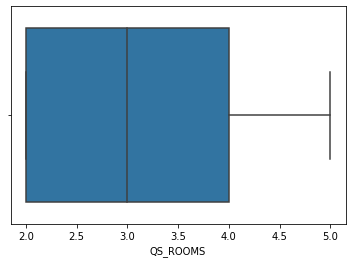

In [295]:
sns.boxplot(x='QS_ROOMS',data=df)

QS_ROOMS has no outliers

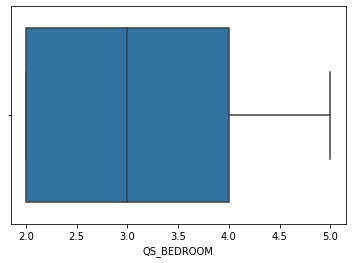

In [296]:
sns.boxplot(x='QS_BEDROOM',data=df)

there is no outlier in QS_BEDROOM column

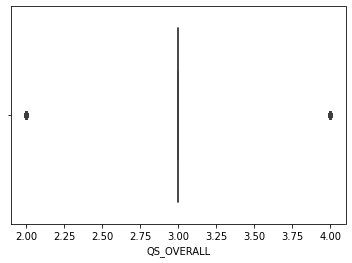

In [297]:
sns.boxplot(x='QS_OVERALL',data=df)

there Are outliers exist in QS_OVERALL column and as it is not bad one we are not going to correct it also

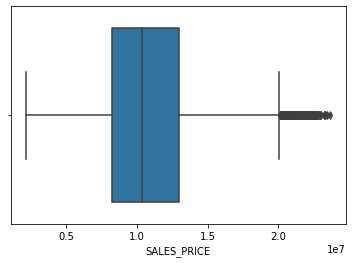

In [298]:
sns.boxplot(x='SALES_PRICE',data=df)

In SALES_PRICE also as the sales price may go beyond some extent for some houses it is common that this column would have outliers and we dont need to correct it.


# **Exploratory data analysis**

**Finding out distribution of each coulmn**

In [299]:
fig_AREA=px.histogram(df,x=df['AREA'],color='AREA',title='AREA wise distribution')
fig_AREA

According to the above histogram plot for AREA , chrompet has highest number of houses  and tnagr has less number as per the data set


In [300]:
fig_INTSQFT=px.histogram(df,x='INT_SQFT',title='Square feet wise distribution')
fig_INTSQFT


highest number of houses are in between **sqft of 1600 to 1649** and the count is **340** and lowest number of house are in between **sqft of 2100 to 2149** and the number of houses in that sqft is **27**

In [301]:
fig_DIST_MAINROAD=px.histogram(df,x='DIST_MAINROAD',title='DISTRIBUTION BASED ON DISTANCE FROM MAINROAD')
fig_DIST_MAINROAD


highest number of houses- **207** are in **distance of 70 to 74 from main road** and lowest number of houses-**150** are in **distance of 40 t0 44 from main road**




In [302]:
fig_DATE_SALE=px.histogram(df,x='DATE_SALE',title='distribution baed on date sale')
fig_DATE_SALE

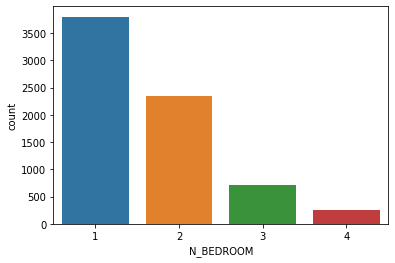

In [303]:

sns.countplot(df['N_BEDROOM'])

Highest number of houses has number of bedroom as 1 and lowest is 4

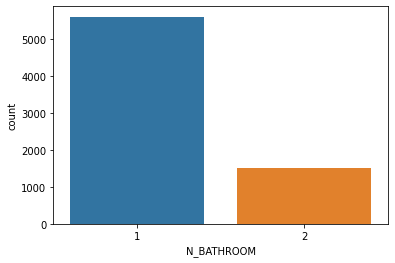

In [304]:
sns.countplot(df['N_BATHROOM'])

highest number of houses has number bathroom as 1 and lowest number has 2

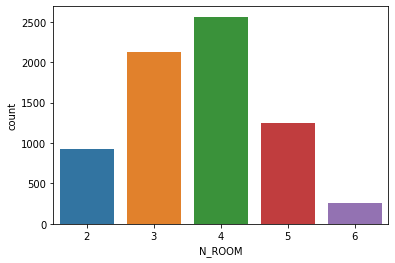

In [305]:
sns.countplot(df['N_ROOM'])

hihgest number of houses has number of room as 4 and lowest number has 6

In [306]:
SALECOND_VALUE=df['SALE_COND'].value_counts()
SALECOND_NAME=df['SALE_COND'].unique()

fig_SALE_COND=px.pie(df,values=SALECOND_VALUE,names=SALECOND_NAME,color=SALECOND_VALUE,title='distribution of sale condition')
fig_SALE_COND

both abnormal and family type of Sales condition has high number of houses

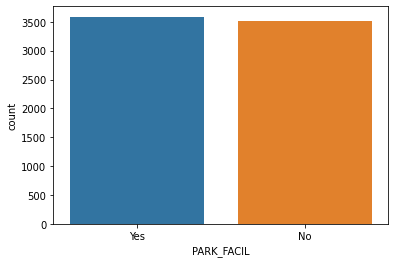

In [307]:
sns.countplot(df['PARK_FACIL'])

number of houses having parking facility is high compared to houses has no parking facility

In [308]:
fig_DATE_BUILD=px.histogram(df,x='DATE_BUILD',title='distribution of DATE_BUILD')
fig_DATE_BUILD

houses are high -200 in date build between jan 1985 to december 1985 
and low -2 in date build between jan 1949 to december 1949

In [309]:

xb=df['BUILDTYPE'].value_counts()
yb=df['BUILDTYPE'].unique()
fig_BUILDTYPE=px.pie(df,values=xb,names=yb,color=yb,title='distribution of buildtype')
fig_BUILDTYPE


Build type of commercial is high and housse type is low according to above pie chart

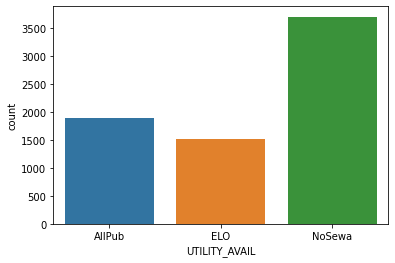

In [310]:
sns.countplot(df.UTILITY_AVAIL)

houses which has no sewage water is high and ELO is low

In [311]:
xs=df['STREET'].value_counts()
ys=df['STREET'].unique()
fig_STREET=go.Figure(data=[go.Pie(values=xs,labels=ys,hole=0.5,title='distributiion based on street')])
fig_STREET.show()

houses with paved street is high and houses are less with no access

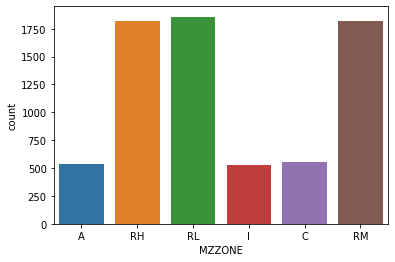

In [312]:
sns.countplot(df.MZZONE)

houses are high in mzzone of RL and low in i zone

In [313]:
xqr=df['QS_ROOMS'].value_counts()
yqr=df['QS_ROOMS'].unique()
fig_QS_ROOMS=px.pie(df,values=xqr,names=yqr,color=xqr,title='distribution based on QS_ROOMS')
fig_QS_ROOMS.update_traces(textposition='inside')
fig_QS_ROOMS

houses with qs rooms of 4 are high and 5 are low

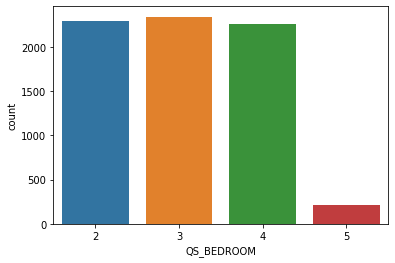

In [314]:
sns.countplot(df.QS_BEDROOM)

houses with qs bedroom of 3 are high and 5 are low

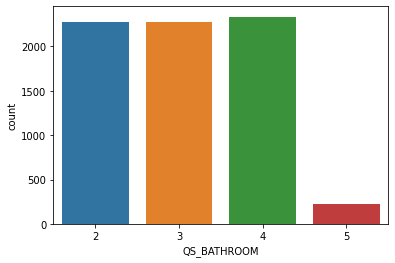

In [315]:
sns.countplot(df.QS_BATHROOM)

houses with qs bathroom of 4 are high and 5 are low

In [316]:
xqa=df['QS_OVERALL'].value_counts()
yqa=df['QS_OVERALL'].unique()
fig_QSO=go.Figure(data=[go.Pie(values=xqa,labels=yqa,text=yqa,pull=[0.1,0,0])])
fig_QSO.show()

houses with qs bathroom 4 are high and 2 are low

In [317]:
fig_HOUSAGE=px.histogram(df,x='HOUSEAGE',color='HOUSEAGE',title='distribution based on age of the house')
fig_HOUSAGE

houses old of 19 years are high and their count is 210 and houses old 52 years lowest and their count is 13

In [318]:
fig_HOUSE_PRICE=px.histogram(df,x='HOUSE_PRICE',nbins=20,title='distribution based on total HOUSE PRICE')
fig_HOUSE_PRICE

houses with price between 8M and 10M are high  and 2M to 4M are low

# **FEATURE VS TARGET PLOTS**

## 1.AREA VS HOUSE_PRICE

Creating a new data frame with area and average house price for each area

In [319]:
x=pd.DataFrame(df.groupby('AREA')['HOUSE_PRICE'].mean())
y=df['AREA'].unique()
y=sorted(y)

data={'Area':y,'average_price':x['HOUSE_PRICE']}
temp=pd.DataFrame(data)
temp.sort_values('average_price',inplace=True)
temp

,Area,average_price
AREA,,
Karapakkam,Karapakkam,7.755477e+06
Adyar,Adyar,9.580581e+06
Chrompet,Chrompet,1.040800e+07
Velachery,Velachery,1.158841e+07
KK Nagar,KK Nagar,1.341933e+07
Anna Nagar,Anna Nagar,1.584423e+07
T Nagar,T Nagar,1.632265e+07


plotting area vs house price using buttons of scatter and barplot

In [320]:
fig_areavstotal=go.Figure(data=[go.Scatter(x=temp['Area'],y=temp['average_price'],mode='markers')])
fig_areavstotal.update_layout(
     updatemenus=[
                  dict(buttons=list([
                       
                                     dict(
                                         args=['type','bar'],
                                         label='Bar plot',
                                    
                                          method='restyle'

                                     ),
                                     dict(
                                         args=['type','scatter'],
                                         label='Scatter plot',
                                          method='restyle'

                                     )

                       ]
                           
                       )
                         
                        )
     ]
                
     
)
fig_areavstotal.show()


there is a relationship in area vs house price which is a linear relationship we can go for label encoding 

### **plotting INT_SQFT and HOUSE_PRICE using histogram **

In [321]:
fig_intsqftvstotalprice=px.scatter(df,x='INT_SQFT',y='HOUSE_PRICE',color='INT_SQFT',title='square feet vs house price ')
fig_intsqftvstotalprice

INT_SQFT has a good relationship with house price which is linear so no transformation required and as it is a numerical value no encoding also required

**DIST_MAINROAD VS HOUSE_PRICE**

In [322]:
fig_distmainroadvshouseprice=px.histogram(df,x='DIST_MAINROAD',y='HOUSE_PRICE',title='DIST_MINROAD vs HOUSE_PRICE')
fig_distmainroadvshouseprice



There is no clear relationship of DIST_MAINROAD with HOUSE_PRICE and its not required to use DIST_MAINROAD as a feature

In [323]:
a=[df.loc[(df.DIST_MAINROAD>i)&(df.DIST_MAINROAD<(i+25)),'HOUSE_PRICE'].mean() for i in range(0,200,25)]
a

[11413199.473105134,
 11361353.930365296,
 11368051.05399061,
 11217404.042505592,
 11344771.67157418,
 11607460.952996476,
 11588614.209273184,
 11519452.342581423]

Text(0.5, 1.0, 'DIST MAINROAD VS HOUSE PRICE')

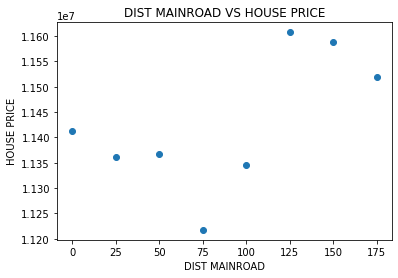

In [324]:
plt.scatter(x=list(range(0,200,25)),y=a)
plt.xlabel('DIST MAINROAD')
plt.ylabel('HOUSE PRICE')
plt.title('DIST MAINROAD VS HOUSE PRICE')

THIS CAN BE USED ONLY CONTINOUS VS CONTINOUS PLOT . by this  we can conclude that delete the DIST_MAINROAD feature 

**N_BEDROOM VS HOUSE_PRICE**

In [325]:
x3=pd.DataFrame(df.groupby('N_BEDROOM')['HOUSE_PRICE'].mean())
y3=df['N_BEDROOM'].unique()
y3=sorted(y3)
data3={'N_BEDROOM':y3,'Average_price':x3['HOUSE_PRICE']}
temp3=pd.DataFrame(data3)
temp3.sort_values('Average_price',inplace=True)
temp3

,N_BEDROOM,Average_price
N_BEDROOM,,
1,1,1.022734e+07
2,2,1.239016e+07
3,3,1.313775e+07
4,4,1.527924e+07


In [326]:
fig_N_BEDROOM=px.bar(temp3,x='N_BEDROOM',y='Average_price',color='N_BEDROOM',title='N_BEDROOM VS HOUSEPRICE')
fig_N_BEDROOM

In [327]:
x4=pd.DataFrame(df.groupby('N_BATHROOM')['HOUSE_PRICE'].mean())
y4=df['N_BATHROOM'].unique()
y4=sorted(y4)
data4={'N_BATHROOM':y4,'Average_price':x4['HOUSE_PRICE']}
temp4=pd.DataFrame(data4)
temp4.sort_values('Average_price',inplace=True)
temp4

,N_BATHROOM,Average_price
N_BATHROOM,,
1,1,1.116952e+07
2,2,1.231133e+07


**Plotting N_BATHROOM VS HOUSEPRICE using barplot**

In [328]:
fig_N_BATHROOM=px.bar(temp4,x='N_BATHROOM',y='Average_price',color='N_BATHROOM',title='N_BATHROOM VS HOUSEPRICE')
fig_N_BATHROOM

In [329]:
x5=pd.DataFrame(df.groupby('N_ROOM')['HOUSE_PRICE'].mean())
y5=df['N_ROOM'].unique()
y5=sorted(y5)
data5={'N_ROOM':y5,'Average_price':x5['HOUSE_PRICE']}
temp5=pd.DataFrame(data5)
temp5.sort_values('Average_price',inplace=True)
temp5

,N_ROOM,Average_price
N_ROOM,,
2,2,7.311581e+06
3,3,9.705458e+06
4,4,1.225463e+07
5,5,1.483657e+07
6,6,1.527924e+07


**plotting N_ROOM Vs HOUSEPRICE**

In [330]:
fig_N_ROOM=px.bar(temp5,x='N_ROOM',y='Average_price',color='N_ROOM',title='N_ROOM VS HOUSEPRICE')
fig_N_ROOM

In [331]:
x6=pd.DataFrame(df.groupby('SALE_COND')['HOUSE_PRICE'].mean())
y6=df['SALE_COND'].unique()
y6=sorted(y6)
data6={'SALE_COND':y6,'Average_price':x6['HOUSE_PRICE']}
temp6=pd.DataFrame(data6)
temp6.sort_values('Average_price',inplace=True)
temp6

,SALE_COND,Average_price
SALE_COND,,
Partial,Partial,1.111605e+07
Family,Family,1.125081e+07
AbNormal,AbNormal,1.143618e+07
Normal Sale,Normal Sale,1.151787e+07
AdjLand,AdjLand,1.173969e+07


**plotting SALE CONDITION vs HOUSE PRICE**

In [332]:
fig_SALE_COND=px.bar(temp6,x='SALE_COND',y='Average_price',color='SALE_COND',title='SALE CONDITION VS AVERAGE PRICE')
fig_SALE_COND

there is a linear relationship between sale condition vs Average price  so we can include this feature and we need to go about label encoding


## **PARK_FACILITY VS HOUSE PRICE**

In [333]:
x7=pd.DataFrame(df.groupby('PARK_FACIL')['HOUSE_PRICE'].mean())
y7=df['PARK_FACIL'].unique()
y7=sorted(y7)
data7={'PARK_FACIL':y7,'Average_price':x7['HOUSE_PRICE']}
temp7=pd.DataFrame(data7)
temp7.sort_values('Average_price',inplace=True)
temp7

,PARK_FACIL,Average_price
PARK_FACIL,,
No,No,1.082803e+07
Yes,Yes,1.198708e+07


In [334]:
fig_PARK_FACIL=px.bar(temp7,x='PARK_FACIL',y='Average_price',color='PARK_FACIL',title='PARKING FACILITY VS HOUSE PRICE')
fig_PARK_FACIL

There is a linear relationship between park facility and house price and we are about to do label encoding as PARK_FACIL is a binary categorical variable


**plotting BUILDTYPE VS HOUSE PRICE**

In [335]:
x8=pd.DataFrame(df.groupby('BUILDTYPE')['HOUSE_PRICE'].mean())
y8=df['BUILDTYPE'].unique()
y8=sorted(y8)
data8={'BUILDTYPE':y8,'Average_price':x8['HOUSE_PRICE']}
temp8=pd.DataFrame(data8)
temp8.sort_values('Average_price',inplace=True)
temp8

,BUILDTYPE,Average_price
BUILDTYPE,,
House,House,9.531205e+06
Others,Others,1.027346e+07
Commercial,Commercial,1.453023e+07


In [336]:
fig_BUILDTYPE=px.bar(temp8,x='BUILDTYPE',y='Average_price',color='BUILDTYPE',title='BUILDTYPE VS HOUSE_PRICE')
fig_BUILDTYPE

There is a relationship between buildtype and house price but it is not linear so we should go for one hot encoding for a multiclass categorical data which has no linear relationship

**UTILITY_AVAIL VS HOUSE_PRICE PLOT**

In [337]:
x9=pd.DataFrame(df.groupby('UTILITY_AVAIL')['HOUSE_PRICE'].mean())
y9=df['UTILITY_AVAIL'].unique()
y9=sorted(y9)
data9={'UTILITY_AVAIL':y9,'Average_price':x9['HOUSE_PRICE']}
temp9=pd.DataFrame(data9)
temp9.sort_values('Average_price',inplace=True)
temp9

,UTILITY_AVAIL,Average_price
UTILITY_AVAIL,,
ELO,ELO,1.094887e+07
NoSewa,NoSewa,1.143351e+07
AllPub,AllPub,1.174658e+07


In [338]:
fig_UTILITY_AVAIL=px.bar(temp9,x='UTILITY_AVAIL',y='Average_price',color='UTILITY_AVAIL',title='UTILITY AVAILBALE VS HOUE PRICE')
fig_UTILITY_AVAIL

there is a linear relationship between UTILITY_AVAIL and LABEL encoding REQUIRED as it is a multiclass catogorical value which has linear relationship

**STREET VS HOUSE PRICE**

In [339]:
x10=pd.DataFrame(df.groupby('STREET')['HOUSE_PRICE'].mean())
y10=df['STREET'].unique()
y10=sorted(y10)
data10={'STREET':y10,'Average_price':x10['HOUSE_PRICE']}
temp10=pd.DataFrame(data10)
temp10.sort_values('Average_price',inplace=True)
temp10

,STREET,Average_price
STREET,,
No Access,No Access,1.045657e+07
Paved,Paved,1.159247e+07
Gravel,Gravel,1.199494e+07


In [340]:
fig_STREETVSHOUSEPRICE=go.Figure(data=[go.Scatter(x=temp10['STREET'],y=temp10['Average_price'],mode='markers')])
fig_STREETVSHOUSEPRICE.update_layout(
     updatemenus=[
                  dict(buttons=list([
                       
                                     dict(
                                         args=['type','bar'],
                                         label='Bar plot',
                                    
                                          method='restyle'

                                     ),
                                     dict(
                                         args=['type','scatter'],
                                         label='Scatter plot',
                                          method='restyle'

                                     )

                       ]
                           
                       )
                         
                        )
     ]
                
     
)
fig_STREETVSHOUSEPRICE.show()


THERS IS NO CLEAR LINEAR RELATIONSHIP BETWEEN STREET AND HOUSEPRICE AND WE SHOULD GO FOR ONE HOT ENCODING FOR MULTI CLASS CATEGORICAL VALUE WHICH HAS NO ORDER

**MZZONE VS HOUSE PRICE**

In [341]:
x11=pd.DataFrame(df.groupby('MZZONE')['HOUSE_PRICE'].mean())
y11=df['MZZONE'].unique()
y11=sorted(y11)
data11={'MZZONE':y11,'Average_price':x11['HOUSE_PRICE']}
temp11=pd.DataFrame(data11)
temp11.sort_values('Average_price',inplace=True)
temp11

,MZZONE,Average_price
MZZONE,,
A,A,7.660002e+06
C,C,8.457634e+06
I,I,9.170939e+06
RH,RH,1.156145e+07
RL,RL,1.231839e+07
RM,RM,1.298932e+07


In [342]:
fig_MZZONEVSHOUSEPRICE=go.Figure(data=[go.Scatter(x=temp11['MZZONE'],y=temp11['Average_price'],mode='markers')])
fig_MZZONEVSHOUSEPRICE.update_layout(
     updatemenus=[
                  dict(buttons=list([
                       
                                     dict(
                                         args=['type','bar'],
                                         label='Bar plot',
                                    
                                          method='restyle'

                                     ),
                                     dict(
                                         args=['type','scatter'],
                                         label='Scatter plot',
                                          method='restyle'

                                     )

                       ]
                           
                       )
                         
                        )
     ]
                
     
)
fig_STREETVSHOUSEPRICE.show()




THERE IS NO CLEAR LINEAR RELATIONSHIP BETWEEN MZZONE AND HOUSE PRICE SO WE SHOULD GO FOR ONE HOT ENCODING FOR MULTICLASS CATOGORICAL VARIABLE WHICH HAS NO ORDER
# ---



**Plotting HOUSE AGE VS HOUSE PRICE**

In [343]:
x12=pd.DataFrame(df.groupby('HOUSEAGE')['HOUSE_PRICE'].mean())
y12=df['HOUSEAGE'].unique()
y12=sorted(y12)
data12={'HOUSEAGE':y12,'Average_price':x12['HOUSE_PRICE']}
temp12=pd.DataFrame(data12)
#temp12.sort_values('Average_price',inplace=True)
temp12

,HOUSEAGE,Average_price
HOUSEAGE,,
3,3,9.485157e+06
4,4,1.130622e+07
5,5,1.191856e+07
6,6,1.222694e+07
7,7,1.168645e+07
8,8,1.181174e+07
9,9,1.175825e+07
10,10,1.203427e+07
11,11,1.219562e+07


In [344]:
fig_Houseage=px.histogram(temp12,x='HOUSEAGE',y='Average_price',title='HOUSEAGE VS HOUSE PRICE')
fig_Houseage

There is no linear relationship between house age and house price and no encoding required for continuous data

## ***DATA ENCODING***

**Label encoding **

In [345]:
# Import label encoder 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'AREA, PARK_FACIL, UTILITY_AVAIL'. 
df['AREA']= label_encoder.fit_transform(df['AREA']) 
df['PARK_FACIL']=label_encoder.fit_transform(df['PARK_FACIL'])
df['UTILITY_AVAIL']=label_encoder.fit_transform(df['UTILITY_AVAIL'])
df['SALE_COND']=label_encoder.fit_transform(df['SALE_COND'])

print(df.head())

   PRT_ID  AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  P03210     4      1004 2011-04-05            131          1           1   
1  P09411     1      1986 2006-12-19             26          2           1   
2  P01812     0       909 2012-04-02             70          1           1   
3  P05346     6      1855 2010-03-13             14          3           2   
4  P06210     4      1226 2009-05-10             84          1           1   

   N_ROOM  SALE_COND  PARK_FACIL  ... MZZONE QS_ROOMS  QS_BATHROOM QS_BEDROOM  \
0       3          0           1  ...      A        4            3          4   
1       5          0           0  ...     RH        4            4          2   
2       3          0           1  ...     RL        4            3          2   
3       5          2           0  ...      I        4            3          3   
4       3          0           1  ...      C        3            2          4   

  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  

ONE HOT ENCODING

In [346]:
df = pd.get_dummies(df,columns=['BUILDTYPE']) #encode the data - one hot encoding is done
df = pd.get_dummies(df,columns=['STREET'])
df
df = pd.get_dummies(df,columns=['MZZONE'])
df



,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,P03210,4,1004,2011-04-05,131,1,1,3,0,1,...,0,0,0,1,1,0,0,0,0,0
1,P09411,1,1986,2006-12-19,26,2,1,5,0,0,...,0,1,0,0,0,0,0,1,0,0
2,P01812,0,909,2012-04-02,70,1,1,3,0,1,...,0,1,0,0,0,0,0,0,1,0
3,P05346,6,1855,2010-03-13,14,3,2,5,2,0,...,1,0,0,1,0,0,1,0,0,0
4,P06210,4,1226,2009-05-10,84,1,1,3,0,1,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,4,598,2011-03-01,51,1,1,2,1,0,...,1,0,1,0,0,0,0,0,0,1
7105,P10000,6,1897,2004-08-04,52,3,2,5,2,1,...,1,0,1,0,0,0,0,1,0,0
7106,P09594,6,1614,2006-08-25,152,2,1,4,3,0,...,0,1,0,0,0,0,1,0,0,0
7107,P06508,4,787,2009-03-08,40,1,1,2,4,1,...,0,0,0,1,0,0,0,0,1,0


Dropping the columns which are looks like not so important

In [347]:
df.drop(['PRT_ID','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','REG_FEE','COMMIS','SALES_PRICE','DATE_SALE','DATE_BUILD'],axis='columns',inplace=True)

In [348]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'HOUSEAGE',
       'HOUSE_PRICE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others', 'STREET_Gravel', 'STREET_No Access', 'STREET_Paved',
       'MZZONE_A', 'MZZONE_C', 'MZZONE_I', 'MZZONE_RH', 'MZZONE_RL',
       'MZZONE_RM'],
      dtype='object')

In [349]:
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,HOUSEAGE,...,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved,MZZONE_A,MZZONE_C,MZZONE_I,MZZONE_RH,MZZONE_RL,MZZONE_RM
0,4,1004,131,1,1,3,0,1,0,44,...,0,0,0,1,1,0,0,0,0,0
1,1,1986,26,2,1,5,0,0,0,11,...,0,1,0,0,0,0,0,1,0,0
2,0,909,70,1,1,3,0,1,1,20,...,0,1,0,0,0,0,0,0,1,0
3,6,1855,14,3,2,5,2,0,2,22,...,1,0,0,1,0,0,1,0,0,0
4,4,1226,84,1,1,3,0,1,0,30,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1,1,2,1,0,1,49,...,1,0,1,0,0,0,0,0,0,1
7105,6,1897,52,3,2,5,2,1,2,9,...,1,0,1,0,0,0,0,1,0,0
7106,6,1614,152,2,1,4,3,0,2,28,...,0,1,0,0,0,0,1,0,0,0
7107,4,787,40,1,1,2,4,1,1,32,...,0,0,0,1,0,0,0,0,1,0


placing the columns in required order

In [350]:
df = df[['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','HOUSEAGE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved','MZZONE_A','MZZONE_C','MZZONE_I','MZZONE_RH','MZZONE_RL','MZZONE_RM','HOUSE_PRICE']]


# SPLITTING THE DATA 

In [351]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]].values, df['HOUSE_PRICE'].values, test_size=0.20, random_state=777)
x_train.shape, x_test.shape
#y_train.shape,y_test.shape


((5687, 22), (1422, 22))

data is splitted into two parts of train(80%) and test (20%)

# **SCALING THE DATA**

In [352]:
#from matplotlib.ticker import scale_range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialising
 # find the values of mu and sigma
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) #only transform the test dataset, dont fit it

scalled the data using standardisation which uses z score now all my data are into same scale

# **MODELLING**

**1.LINEAR REGRESSION**

In [353]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(x_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

getting the coefficient 

In [354]:
coeff_df=pd.DataFrame(regressor.coef_,['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','HOUSEAGE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved','MZZONE_A','MZZONE_C','MZZONE_I','MZZONE_RH','MZZONE_RL','MZZONE_RM'],columns=['Coefficient'])
y_pred = regressor.predict(x_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
coeff_df

,Coefficient
AREA,-5.029049e+05
INT_SQFT,1.934967e+06
DIST_MAINROAD,1.548216e+04
N_BEDROOM,-1.250100e+06
N_BATHROOM,-4.515070e+05
N_ROOM,1.771071e+06
SALE_COND,-1.592408e+05
PARK_FACIL,5.375532e+05
UTILITY_AVAIL,-1.032878e+05
HOUSEAGE,-2.101927e+05


getting the intercept c

In [355]:
print(regressor.intercept_) # c

11439414.43050662


creating dataframe of actual and predicted target value

In [356]:
dfp=pd.DataFrame({"Acutal":y_test,"predicted":y_pred})
dfp

,Acutal,predicted
0,6896799,8.182838e+06
1,11776523,1.251820e+07
2,11046001,1.185183e+07
3,14464934,1.495173e+07
4,9429200,9.460278e+06
...,...,...
1417,8733272,8.868918e+06
1418,12814557,1.369106e+07
1419,8906756,9.301814e+06
1420,12453934,1.235781e+07


Evaluation metric 

In [357]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 845604.0238263425
Mean Squared Error: 1227674309514.2808
R2- SCORE: 0.920162686475409


evaluation metric for linear regression which is R2 is 0.92 which is a best one

Feature selection

In [358]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=2, step=1) #number of features to be selected are 2 and im going to drop one feature at one step
selector = selector.fit(x_train, y_train)
list(zip(['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','HOUSEAGE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved','MZZONE_A','MZZONE_C','MZZONE_I','MZZONE_RH','MZZONE_RL','MZZONE_RM'],selector.support_))

[('AREA', False),
 ('INT_SQFT', False),
 ('DIST_MAINROAD', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('HOUSEAGE', False),
 ('BUILDTYPE_Commercial', False),
 ('BUILDTYPE_House', False),
 ('BUILDTYPE_Others', False),
 ('STREET_Gravel', False),
 ('STREET_No Access', False),
 ('STREET_Paved', False),
 ('MZZONE_A', False),
 ('MZZONE_C', False),
 ('MZZONE_I', False),
 ('MZZONE_RH', False),
 ('MZZONE_RL', False),
 ('MZZONE_RM', False)]

two important features predicted by RFE Are N_BEDROOM , N_ROOM

In [359]:
!pip install scikit-learn==0.24.2

Feature selection by Sequentialfeatureselector

In [360]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)#zip combining the features with true or false
sfs.fit(x_train, y_train)
print(list(zip(['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','HOUSEAGE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved','MZZONE_A','MZZONE_C','MZZONE_I','MZZONE_RH','MZZONE_RL','MZZONE_RM'],sfs.get_support())))

[('AREA', False), ('INT_SQFT', True), ('DIST_MAINROAD', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', False), ('SALE_COND', False), ('PARK_FACIL', False), ('UTILITY_AVAIL', False), ('HOUSEAGE', False), ('BUILDTYPE_Commercial', True), ('BUILDTYPE_House', False), ('BUILDTYPE_Others', False), ('STREET_Gravel', False), ('STREET_No Access', False), ('STREET_Paved', False), ('MZZONE_A', False), ('MZZONE_C', False), ('MZZONE_I', False), ('MZZONE_RH', False), ('MZZONE_RL', False), ('MZZONE_RM', False)]


sfs returns INT_SQFT and BUILDTYPE_commercial as two important features

Cross validation

In [361]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression() #untrained model
cv_results = cross_validate(regressor, x_train, y_train, cv=10, scoring = "r2")
cv_results['test_score'].mean()


0.9156314992436382

# **2.DECISION TREE**

In [362]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
dt.fit(x_train, y_train)
dt.predict(x_test), y_test



(array([ 7279675., 12333030., 12329564., ..., 10943862., 12018100.,
        13348867.]),
 array([ 6896799, 11776523, 11046001, ...,  8906756, 12453934, 12011262]))

Evaluation metric

In [363]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute y_pred
y_pred = dt.predict(x_test)

# Compute mse_dt
mse_dt = mean_squared_error(y_test, y_pred)
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set RMSE of dt: 780256.67
Test set R2 of dt: 0.96


R2 is 0.96 which is really good one

In [364]:
dfdt=df[['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','HOUSEAGE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved','MZZONE_A','MZZONE_C','MZZONE_I','MZZONE_RH','MZZONE_RL','MZZONE_RM']]

In [365]:
dfdt_list=list(dfdt.columns)

## Visualising the decision tree

[Text(197.65066277371324, 212.71304347826086, 'X[1] <= 0.273\nmse = 15603805573715.703\nsamples = 5687\nvalue = 11435329.903'),
 Text(116.00375220416824, 203.2591304347826, 'X[10] <= 0.363\nmse = 7000191567632.531\nsamples = 3080\nvalue = 9397659.852'),
 Text(76.11494654775336, 193.80521739130435, 'X[0] <= 0.295\nmse = 3445513921864.625\nsamples = 2089\nvalue = 8292110.071'),
 Text(42.84194854216837, 184.3513043478261, 'X[1] <= -0.951\nmse = 2071372308337.688\nsamples = 1438\nvalue = 9012247.165'),
 Text(21.253624013061142, 174.89739130434782, 'X[21] <= 0.572\nmse = 1493054947404.008\nsamples = 585\nvalue = 8059014.94'),
 Text(12.303361853836538, 165.44347826086957, 'X[7] <= -0.009\nmse = 1326358928610.484\nsamples = 423\nvalue = 7709575.125'),
 Text(5.102291099856612, 155.98956521739132, 'X[1] <= -1.48\nmse = 1014148448204.688\nsamples = 220\nvalue = 7179471.009'),
 Text(2.071035699841906, 146.53565217391304, 'X[20] <= 0.523\nmse = 842453536978.906\nsamples = 40\nvalue = 6130544.7'),


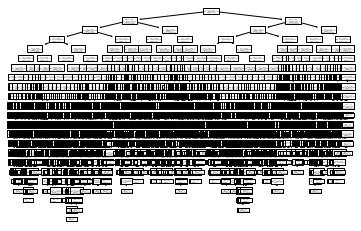

In [366]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt

### Feature importance by decision tree

In [367]:
dt = DecisionTreeRegressor(max_depth = 7)
# Fit dt to the training set
dt.fit(x_train, y_train)
x_test=np.array(x_test)
importances = dt.feature_importances_

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(dfdt_list, importances)]
feature_importances


[('AREA', 0.126),
 ('INT_SQFT', 0.429),
 ('DIST_MAINROAD', 0.0),
 ('N_BEDROOM', 0.058),
 ('N_BATHROOM', 0.003),
 ('N_ROOM', 0.0),
 ('SALE_COND', 0.0),
 ('PARK_FACIL', 0.012),
 ('UTILITY_AVAIL', 0.0),
 ('HOUSEAGE', 0.0),
 ('BUILDTYPE_Commercial', 0.339),
 ('BUILDTYPE_House', 0.001),
 ('BUILDTYPE_Others', 0.0),
 ('STREET_Gravel', 0.001),
 ('STREET_No Access', 0.001),
 ('STREET_Paved', 0.0),
 ('MZZONE_A', 0.01),
 ('MZZONE_C', 0.005),
 ('MZZONE_I', 0.001),
 ('MZZONE_RH', 0.001),
 ('MZZONE_RL', 0.003),
 ('MZZONE_RM', 0.009)]

We can interpret that INT_SQFT and BUILDTYPE_commercial are important features

# **KNN Regressor**

In [368]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2)

#Printing all the parameters of KNN
print(RegModel)

#Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(x_train)))

#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))



KNeighborsRegressor(n_neighbors=2)
R2 Value: 0.9553362763826134
Accuracy 90.41395728338054


KNN gives R2 value of 0.955

## Bagging Regressor 

In [369]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
# weakLearner = tree.DecisionTreeClassifier(max_depth = 1)
# weakLearner.fit(x_train, y_train)
# weakLearner.score(x_test,y_test)
model = BaggingRegressor(tree.DecisionTreeRegressor(max_depth = 5, random_state=1), n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9009862797234744

In [370]:


y_train = np.array(y_train) # target varaibles


# Convert to numpy array
x_train = np.array(x_train) 
x_train



array([[ 0.02303782,  1.77191347,  0.76649424, ..., -0.58310327,
         1.65128331, -0.57985447],
       [ 0.02303782,  2.41333173,  0.50497618, ..., -0.58310327,
        -0.6055896 ,  1.72457066],
       [ 0.5666731 , -0.40495465, -0.85491772, ...,  1.71496208,
        -0.6055896 , -0.57985447],
       ...,
       [-0.52059745, -0.63779827, -0.34931614, ..., -0.58310327,
         1.65128331, -0.57985447],
       [-0.52059745, -0.99585024,  1.53361387, ..., -0.58310327,
         1.65128331, -0.57985447],
       [ 0.5666731 , -1.3011829 , -0.4713579 , ..., -0.58310327,
        -0.6055896 ,  1.72457066]])

# **Random** forest Regressor 

In [371]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 100, max_depth = 5, max_features='sqrt')

# Train the model on training data
rf.fit(x_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('MAE :', round(np.mean(errors), 2), 'degrees.')


#r2_score(baseline_preds, original_test_labels)
print('r2:',r2_score(predictions,y_test ))

MAE : 1148706.96 degrees.
r2: 0.72294700229089


random forest gives R2 value of 0.72

In [372]:
x_train.shape

(5687, 22)

In [373]:
dfrf = df[['AREA','INT_SQFT','DIST_MAINROAD','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','HOUSEAGE','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved','MZZONE_A','MZZONE_C','MZZONE_I','MZZONE_RH','MZZONE_RL','MZZONE_RM']]


In [374]:
dfrf_list = list(dfrf.columns)
dfrf_list

['AREA',
 'INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'SALE_COND',
 'PARK_FACIL',
 'UTILITY_AVAIL',
 'HOUSEAGE',
 'BUILDTYPE_Commercial',
 'BUILDTYPE_House',
 'BUILDTYPE_Others',
 'STREET_Gravel',
 'STREET_No Access',
 'STREET_Paved',
 'MZZONE_A',
 'MZZONE_C',
 'MZZONE_I',
 'MZZONE_RH',
 'MZZONE_RL',
 'MZZONE_RM']

In [375]:
from sklearn import tree
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = dfrf_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png');

In [376]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 5


In [377]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 5, random_state=42)
rf_small.fit(x_train, y_train)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = dfrf_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

graph.write_png('small_tree.png');

Feature importance by Random forest regression

In [378]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(dfrf_list, importances)]

# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: AREA                 Importance: 0.069
Variable: INT_SQFT             Importance: 0.268
Variable: DIST_MAINROAD        Importance: 0.001
Variable: N_BEDROOM            Importance: 0.049
Variable: N_BATHROOM           Importance: 0.008
Variable: N_ROOM               Importance: 0.172
Variable: SALE_COND            Importance: 0.0
Variable: PARK_FACIL           Importance: 0.004
Variable: UTILITY_AVAIL        Importance: 0.0
Variable: HOUSEAGE             Importance: 0.006
Variable: BUILDTYPE_Commercial Importance: 0.246
Variable: BUILDTYPE_House      Importance: 0.059
Variable: BUILDTYPE_Others     Importance: 0.031
Variable: STREET_Gravel        Importance: 0.002
Variable: STREET_No Access     Importance: 0.003
Variable: STREET_Paved         Importance: 0.0
Variable: MZZONE_A             Importance: 0.035
Variable: MZZONE_C             Importance: 0.016
Variable: MZZONE_I             Importance: 0.007
Variable: MZZONE_RH            Importance: 0.002
Variable: MZZONE_RL       

From above we can interpret that BUILDTYPE_commercial has high feature importance followed by INT_SQFT

New random forest with only the two most important variables


In [379]:

rf_most_important = RandomForestRegressor(n_estimators= 100, max_depth =5, max_features='auto')

# Extract the two most important features
important_indices = [dfrf_list.index('BUILDTYPE_Commercial'), dfrf_list.index('INT_SQFT')]
train_important = x_train[:, important_indices]
test_important = x_test[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - y_test)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

print('r2:',r2_score(predictions, y_test))

Mean Absolute Error: 1605132.93 degrees.
r2: 0.647564212513932


Random forest with two imporatant features alone gives R2 of 0.65

Gradient Boosting

In [259]:
from sklearn.ensemble import GradientBoostingRegressor
for lr in [0.01,0.05,0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(x_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Test score : ", model.score(x_test,y_test))

Learning rate :  0.01  Train score :  0.6936878009261345  Test score :  0.6976281833628684
Learning rate :  0.05  Train score :  0.9589588625863434  Test score :  0.9612835286857928
Learning rate :  0.1  Train score :  0.9879576450160458  Test score :  0.9873129820777536
Learning rate :  0.3  Train score :  0.9951283951997055  Test score :  0.9940754857491065
Learning rate :  0.5  Train score :  0.9969381740313942  Test score :  0.996077346828574
Learning rate :  0.8  Train score :  0.9972533505112793  Test score :  0.9951537627470441
Learning rate :  1  Train score :  0.9979268542861336  Test score :  0.996246047529254


# **XG boost regressor**

In [260]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.4333708226673221  Cross-Val score :  -0.443089116100856
Learning rate :  0.02  Train score :  0.7009834304215117  Cross-Val score :  0.6953622382765814
Learning rate :  0.03  Train score :  0.8926350252491095  Cross-Val score :  0.8877809737161575
Learning rate :  0.04  Train score :  0.9388777064450566  Cross-Val score :  0.9356143616371317
Learning rate :  0.05  Train score :  0.9592940207482994  Cross-Val score :  0.9555514586520377
Learning rate :  0.1  Train score :  0.9877542910436267  Cross-Val score :  0.9853502829058028
Learning rate :  0.11  Train score :  0.9892080025125138  Cross-Val score :  0.9871698859968989
Learning rate :  0.12  Train score :  0.9904947388904106  Cross-Val score :  0.9883945710630136
Learning rate :  0.13  Train score :  0.9919503593446317  Cross-Val score :  0.9894400071354974
Learning rate :  0.14  Train score :  0.9920423580138827  Cross-Val score :  0.9906538013551976
Learning rate :  0.15  Train score :  0.

### Learning **Rate** with 0.5 gives highest validation score among all models which is **0.99468

# **Voting regressor**

In [261]:
from sklearn.ensemble import VotingRegressor # this is the function that ensembles my model
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


model1 = LinearRegression()
model2 = tree.DecisionTreeRegressor(max_depth =5,random_state=1)
model3 = KNeighborsRegressor(3)
model4=RandomForestRegressor(random_state=1)
model5= GradientBoostingRegressor(random_state=1)
votingreg = VotingRegressor(estimators=[('lr', model1), ('dt', model2),('knn',model3),('RF',model4),('GBOOST',model5)])
 # it will stitich all the models together, voting = hard means max voting 
# we need to give the list of models that we are trying to combine
votingreg.fit(x_train,y_train) # to train all of the models
preds = votingreg.predict(x_test)
votingreg.score(x_test,y_test) # prediction

0.975242110791104

voting regressor gives the score of 0.97


# **Final interpretation**

1.Among all the models used XG Boost regressor gives better accuracy of 0.99468 which can be used as a final model .

2.Regarding the features, INT_SQFT and BULDTYPE_commercial are the two important features predicted by most of the models so we can conclude that these two features can fetch more money.